In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
enquiry_data_path = "Cleaned Data/enquiry_df_cleaned.csv"
finance_data_path = "Cleaned Data/finance_df_cleaned.csv"
retail_data_path = "Cleaned Data/retail_df_cleaned.csv"

In [3]:
enquiry_df = pd.read_csv(enquiry_data_path)
finance_df = pd.read_csv(finance_data_path)
retail_df = pd.read_csv(retail_data_path, parse_dates=['BookingDate','ReqDeliveryDate','PromisedDeliveryDate',
                                                       'InvoiceDate'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Cleaning = Retail Data

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398275 entries, 0 to 398274
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Enquiry               357857 non-null  object        
 1   BookingNo             372158 non-null  object        
 2   BookingDate           372158 non-null  datetime64[ns]
 3   ReqDeliveryDate       372158 non-null  datetime64[ns]
 4   PromisedDeliveryDate  372158 non-null  datetime64[ns]
 5   InvoiceNo             398275 non-null  object        
 6   InvoiceDate           398275 non-null  datetime64[ns]
 7   DealerCity            391695 non-null  object        
 8   DealerState           398168 non-null  object        
 9   BranchType            398270 non-null  object        
 10  CustomerCode          398275 non-null  object        
 11  City                  392901 non-null  object        
 12  ZIPCODE               391132 non-null  float64       
 13 

In [5]:
retail_df['Enquiry_flag'] = np.where(retail_df['Enquiry'].isna(),0,1)
retail_df['Booking_flag'] = np.where(retail_df['BookingNo'].isna(),0,1)

In [6]:
def get_char(x):
    return " ".join(re.findall("[a-zA-Z]+", x))

retail_df['Invoice_type'] = pd.Series(list(map(get_char,retail_df['InvoiceNo']))).str.upper()

In [7]:
temp_cities = retail_df[retail_df['DealerState'].isna()][['DealerCity','DealerState']].groupby(['DealerCity']).size()#.index.tolist()

In [8]:
new_ret = retail_df.copy()
new_ret['DealerCity'] = new_ret['DealerCity'].str.replace("COCHIN","KOCHI").tolist()
retail_df['DealerCity'] = retail_df['DealerCity'].str.replace("COCHIN","KOCHI").tolist()

In [9]:
temp_city_state = sorted(retail_df[['DealerCity','DealerState']].groupby(['DealerCity','DealerState']).size().to_dict().keys())
city_state = dict()
for city,state in temp_city_state:
    city_state[city] = state
city_state

{'ABOHAR': 'Punjab',
 'ADILABAD': 'Telangana',
 'AGARTALA': 'Tripura',
 'AGRA': 'Uttar Pradesh',
 'AHMEDABAD': 'Gujarat',
 'AHMEDNAGAR': 'Maharashtra',
 'AIZAWAL': 'Mizoram',
 'AJNALA': 'Punjab',
 'AKBARPUR': 'Uttar Pradesh',
 'AKOLA': 'Maharashtra',
 'ALIBAG': 'Maharashtra',
 'ALIGARH': 'Uttar Pradesh',
 'ALLAHABAD': 'Uttar Pradesh',
 'ALLEPPEY': 'Kerala',
 'ALWAR': 'Rajasthan',
 'ALWAYE': 'Kerala',
 'AMALAPURAM (M)': 'Andhra Pradesh',
 'AMBALA': 'Haryana',
 'AMBEDKAR NAGAR': 'Uttar Pradesh',
 'AMBIKAPUR': 'Chattisgarh',
 'AMRAVATI': 'Maharashtra',
 'AMRELI': 'Gujarat',
 'AMRITSAR': 'Punjab',
 'AMROHA': 'Uttar Pradesh',
 'ANAND': 'Gujarat',
 'ANANTPUR': 'Andhra Pradesh',
 'ANGUL': 'Odisha',
 'ANKLESHWAR': 'Gujarat',
 'ARRAH': 'Bihar',
 'ASANSOL': 'West Bengal',
 'ASHOK NAGAR (M)': 'Madhya Pradesh',
 'ASSANDH (MC)': 'Haryana',
 'ATRU': 'Rajasthan',
 'AURANGABAD': 'Maharashtra',
 'AURANGABAD (M)': 'Bihar',
 'AURIMORE': 'Uttar Pradesh',
 'AZAMGARH': 'Uttar Pradesh',
 'BAGALKOT': 'Karnata

In [10]:
new_ret['DealerState'][new_ret['DealerState'].isna()] = new_ret['DealerCity'].map(city_state)
new_state = new_ret['DealerState']
old_state = retail_df['DealerState']
old_state = old_state.fillna(new_state)

<ipython-input-10-eaf2ffe7064e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ret['DealerState'][new_ret['DealerState'].isna()] = new_ret['DealerCity'].map(city_state)


In [11]:
retail_df['DealerState'] = old_state
retail_df.isna().sum()

Enquiry                  40418
BookingNo                26117
BookingDate              26117
ReqDeliveryDate          26117
PromisedDeliveryDate     26117
InvoiceNo                    0
InvoiceDate                  0
DealerCity                6580
DealerState                  0
BranchType                   5
CustomerCode                 0
City                      5374
ZIPCODE                   7143
ModelFamily                  0
ModelCode                    0
Color                        0
ChassisNo                    1
EngineNo                     1
TotalAmount                  0
FinanceCompany          231120
Age                     375854
Segment                      0
Enquiry_flag                 0
Booking_flag                 0
Invoice_type                 0
dtype: int64

In [12]:
temp_city_branch = sorted(retail_df[['DealerCity','BranchType']].groupby(['DealerCity','BranchType']).size().to_dict().keys())
city_branch = dict()
for city,branch in temp_city_branch:
    city_branch[city] = branch
city_branch

{'ABOHAR': 'Urban',
 'ADILABAD': 'Urban',
 'AGARTALA': 'Urban',
 'AGRA': 'Urban',
 'AHMEDABAD': 'Urban',
 'AHMEDNAGAR': 'Urban',
 'AIZAWAL': 'Rural',
 'AJNALA': 'Urban',
 'AKBARPUR': 'Urban',
 'AKOLA': 'Urban',
 'ALIBAG': 'Urban',
 'ALIGARH': 'Urban',
 'ALLAHABAD': 'Urban',
 'ALLEPPEY': 'Urban',
 'ALWAR': 'Urban',
 'ALWAYE': 'Urban',
 'AMALAPURAM (M)': 'Urban',
 'AMBALA': 'Urban',
 'AMBEDKAR NAGAR': 'Urban',
 'AMBIKAPUR': 'Urban',
 'AMRAVATI': 'Urban',
 'AMRELI': 'Urban',
 'AMRITSAR': 'Urban',
 'AMROHA': 'Urban',
 'ANAND': 'Urban',
 'ANANTPUR': 'Urban',
 'ANGUL': 'Urban',
 'ANKLESHWAR': 'Urban',
 'ARRAH': 'Urban',
 'ASANSOL': 'Urban',
 'ASHOK NAGAR (M)': 'Urban',
 'ASSANDH (MC)': 'Urban',
 'ATRU': 'Urban',
 'AURANGABAD': 'Urban',
 'AURANGABAD (M)': 'Urban',
 'AURIMORE': 'Urban',
 'AZAMGARH': 'Urban',
 'BAGALKOT': 'Urban',
 'BAGRU': 'Rural',
 'BAHADURGARH': 'Rural',
 'BAHRAICH': 'Urban',
 'BAIKUNTHPUR (NAC)': 'Urban',
 'BALAGHAT': 'Urban',
 'BALASORE': 'Urban',
 'BALLABGARH': 'Urban',
 

In [13]:
new_ret['BranchType'][new_ret['BranchType'].isna()] = new_ret['DealerCity'].map(city_branch)
new_branch = new_ret['BranchType']
old_branch = retail_df['BranchType']
old_branch = old_branch.fillna(new_branch)

<ipython-input-13-ab34717f8349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ret['BranchType'][new_ret['BranchType'].isna()] = new_ret['DealerCity'].map(city_branch)


In [14]:
retail_df['BranchType'] = old_branch
retail_df.isna().sum()

Enquiry                  40418
BookingNo                26117
BookingDate              26117
ReqDeliveryDate          26117
PromisedDeliveryDate     26117
InvoiceNo                    0
InvoiceDate                  0
DealerCity                6580
DealerState                  0
BranchType                   0
CustomerCode                 0
City                      5374
ZIPCODE                   7143
ModelFamily                  0
ModelCode                    0
Color                        0
ChassisNo                    1
EngineNo                     1
TotalAmount                  0
FinanceCompany          231120
Age                     375854
Segment                      0
Enquiry_flag                 0
Booking_flag                 0
Invoice_type                 0
dtype: int64

In [15]:
retail_df.shape

(398275, 25)

In [16]:
retail_df = retail_df.dropna(subset=['DealerCity'])

In [17]:
retail_df.shape

(391695, 25)

In [18]:
def remove_short_chassis(x):
    if len(str(x)) != 17:
        x = np.nan
    return x

retail_df['ChassisNo'] = pd.Series(list(map(remove_short_chassis, retail_df['ChassisNo'])))

In [19]:
retail_df = retail_df.dropna(subset = ['ChassisNo','EngineNo']).reset_index()
retail_df = retail_df.iloc[:,1:]

In [20]:
retail_df['Finance_flag'] = np.where(retail_df['FinanceCompany'].isna(),0,1)

In [21]:
def extract_age(x):
    try :
        x = float(str(x)[:2])
    except:
        x = np.nan
    return x

retail_df['Age'] = pd.Series(list(map(extract_age,retail_df['Age'])))

In [22]:
retail_df['Age'].head(60)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     0.0
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24    32.0
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35    26.0
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49    33.0
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     0.0
59     NaN
Name: Age, dtype: float64

In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385113 entries, 0 to 385112
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Enquiry               345432 non-null  object        
 1   BookingNo             359298 non-null  object        
 2   BookingDate           359298 non-null  datetime64[ns]
 3   ReqDeliveryDate       359298 non-null  datetime64[ns]
 4   PromisedDeliveryDate  359298 non-null  datetime64[ns]
 5   InvoiceNo             385113 non-null  object        
 6   InvoiceDate           385113 non-null  datetime64[ns]
 7   DealerCity            385113 non-null  object        
 8   DealerState           385113 non-null  object        
 9   BranchType            385113 non-null  object        
 10  CustomerCode          385113 non-null  object        
 11  City                  379970 non-null  object        
 12  ZIPCODE               378213 non-null  float64       
 13 

In [24]:
retail_df.isna().sum()

Enquiry                  39681
BookingNo                25815
BookingDate              25815
ReqDeliveryDate          25815
PromisedDeliveryDate     25815
InvoiceNo                    0
InvoiceDate                  0
DealerCity                   0
DealerState                  0
BranchType                   0
CustomerCode                 0
City                      5143
ZIPCODE                   6900
ModelFamily                  0
ModelCode                    0
Color                        0
ChassisNo                    0
EngineNo                     0
TotalAmount                  0
FinanceCompany          224816
Age                     363274
Segment                      0
Enquiry_flag                 0
Booking_flag                 0
Invoice_type                 0
Finance_flag                 0
dtype: int64

In [25]:
retail_df = retail_df.dropna(subset=['City','ZIPCODE'])

In [26]:
retail_df.isna().sum()

Enquiry                  32659
BookingNo                25404
BookingDate              25404
ReqDeliveryDate          25404
PromisedDeliveryDate     25404
InvoiceNo                    0
InvoiceDate                  0
DealerCity                   0
DealerState                  0
BranchType                   0
CustomerCode                 0
City                         0
ZIPCODE                      0
ModelFamily                  0
ModelCode                    0
Color                        0
ChassisNo                    0
EngineNo                     0
TotalAmount                  0
FinanceCompany          217615
Age                     356005
Segment                      0
Enquiry_flag                 0
Booking_flag                 0
Invoice_type                 0
Finance_flag                 0
dtype: int64

In [27]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377760 entries, 0 to 385112
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Enquiry               345101 non-null  object        
 1   BookingNo             352356 non-null  object        
 2   BookingDate           352356 non-null  datetime64[ns]
 3   ReqDeliveryDate       352356 non-null  datetime64[ns]
 4   PromisedDeliveryDate  352356 non-null  datetime64[ns]
 5   InvoiceNo             377760 non-null  object        
 6   InvoiceDate           377760 non-null  datetime64[ns]
 7   DealerCity            377760 non-null  object        
 8   DealerState           377760 non-null  object        
 9   BranchType            377760 non-null  object        
 10  CustomerCode          377760 non-null  object        
 11  City                  377760 non-null  object        
 12  ZIPCODE               377760 non-null  float64       
 13 

In [28]:
for length in range(0,30):
    print(length,":",len(retail_df['CustomerCode'][retail_df['CustomerCode'].str.len()==length]))
    display(retail_df['CustomerCode'][retail_df['CustomerCode'].str.len()==length])

0 : 0


Series([], Name: CustomerCode, dtype: object)

1 : 36


1241      9
1637      9
5075      9
7660      9
14433     9
21945     9
23360     9
23540     8
30520     9
34701     9
35293     9
39260     9
39814     9
40177     9
46534     9
47988     9
48997     9
49233     9
54217     9
54970     9
55026     8
55216     9
56183     9
57918     8
61843     9
62112     8
64790     9
65393     9
67144     9
68561     9
69073     9
74240     9
75251     9
75319     9
256567    9
258557    9
Name: CustomerCode, dtype: object

2 : 19


798       24
1990      61
9972      51
21319     61
32736     61
34394     24
38588     61
38787     27
42080     61
45062     24
45417     61
46631     51
54885     61
55339     51
55384     61
61755     51
78411     51
79025     26
163467    26
Name: CustomerCode, dtype: object

3 : 65


3419      222
7160      852
7809      222
8517      123
9975      FO0
         ... 
263809    FO0
266802    FO0
275305    pal
282949    FO0
282956    FO0
Name: CustomerCode, Length: 65, dtype: object

4 : 245


451       ASC9
568       9893
1930      9891
2190      B320
2343      B035
          ... 
248246    1115
283690    1402
310118    1402
340349    2923
346827    2923
Name: CustomerCode, Length: 245, dtype: object

5 : 11490


6         25477
9         29479
13        29258
14        65159
19        10310
          ...  
384984    10363
384985    10363
384997    11683
385051    11888
385061    11971
Name: CustomerCode, Length: 11490, dtype: object

6 : 593


1         a27776
76        SAT-26
129       A66076
210       271401
256       JASBIR
           ...  
318330    a27592
322436    JASBIR
325519    JASBIR
361390    SAT-26
374558    ASHTA1
Name: CustomerCode, Length: 593, dtype: object

7 : 648


72        25196..
362       SSASC04
386       A-26070
574       SSASC05
686       A-25683
           ...   
336469    RSO6060
336907    RSO6060
350998    SLK2017
369447    SLK2017
379241    DH26903
Name: CustomerCode, Length: 648, dtype: object

8 : 1213


3         10203RSO
101       ASC27115
172       SHYAMPUR
285       CHANDBAD
355       sat-1501
            ...   
383311    CUS25434
383626    CUS25478
383885    CUS25510
383932    CUS25526
384518    CUS25472
Name: CustomerCode, Length: 1213, dtype: object

9 : 890


8         104011003
84        ASC-10013
219       287533687
352       SHUJALPUR
481       268652024
            ...    
327927    285213460
332955    ASCGAA002
339827    ASC-54781
357344    ASC-10170
371916    285213460
Name: CustomerCode, Length: 890, dtype: object

10 : 4966


61        11781ASC07
63        11341ASC26
91        10422ASC07
121       ASC-SAS-06
123       10155ASC04
             ...    
380943    CUS-128847
380964    CUS-129055
383326    CUS-129053
384236    10310RSO19
385060    CUS-129054
Name: CustomerCode, Length: 4966, dtype: object

11 : 3050


39        SUP.1243005
95        ASC-10443-4
114       ASC-10443-3
149       ASCTEKUATAR
184       ASC-10430-7
             ...     
383918    CUS-1290091
384122    CUS-1291034
384341    CUS-1291029
384589    ASC-10163-1
384623    CUS-1289540
Name: CustomerCode, Length: 3050, dtype: object

12 : 14860


24        CUS-28970748
36        10727-ASC-03
43        ASC-10148-07
47        10734-ASC-01
48        ASC-10954-03
              ...     
385008    CUS-12791895
385027    CUS-12877122
385053    CUS-12871147
385079    CUS-12868146
385096    CUS-12851463
Name: CustomerCode, Length: 14860, dtype: object

13 : 150924


5         ASC-10963-D06
10        CUS-126751307
12        CUS-105958764
15        CUS-109128475
16        CUS-102772541
              ...      
385092    CUS-126384055
385094    CUS-120807171
385106    CUS-114989879
385109    CUS-120807227
385110    CUS-123137802
Name: CustomerCode, Length: 150924, dtype: object

14 : 181031


0         CUS-1086229299
2         CUS-1075416367
4         CUS-1017014963
7         CUS-1047326783
18        CUS-1037425086
               ...      
385104    CUS-1091224235
385105    CUS-1096330463
385107    CUS-1138114490
385108    CUS-1063926357
385112    CUS-1154919265
Name: CustomerCode, Length: 181031, dtype: object

15 : 4860


150       ASC-10690-SUB-D
196       11272 BK 123458
209       CUST-11862-8851
265       CUS-10416141660
323       CUST-11851-4280
               ...       
384964    CUS-10416137533
384987    CUS-10416138368
385074    CUS-10416138469
385103    CUS-10416138504
385111    CUS-10416138566
Name: CustomerCode, Length: 4860, dtype: object

16 : 2568


557       CUST-11838-15415
595       11272 BK 7871741
638       CUST-11843-15332
807       CUST-11841-11727
864       11272 BK 6346564
                ...       
383897    CUST-11838-15901
384166    CUST-11838-15958
384169    CUST-11838-16011
384197    CUST-11838-15969
384484    CUST-11843-23013
Name: CustomerCode, Length: 2568, dtype: object

17 : 33


5978     10721-S.M.H BAJAJ
11295    11272 BK 54184154
12081    11272 BK 12556446
17273    12093-ASC-2016-01
23117    12093-ASC-2017-02
23402    11272 BK 12556446
23524    11272 BK 12345674
24389    11272 BK 98674152
24979    11272 BK 12345674
25166    11272 BK 12345674
25611    11272 BK 85987464
31449    11272 BK 12345674
32594    CUS-10419-1009120
32948    11272 BK 12345674
33474    10369-ASC-BHOSARI
34519    12093-ASC-2016-01
34845    12093-ASC-2016-01
36826    CUS-OTH-10145-001
37534    11272 BK 12556446
37697    12093-ASC-2016-01
40528    11272 BK 12345674
41422    11272 BK 12345674
46949    11272 bk 78254544
52935    10369-ASC-BHOSARI
54966    11272 BK 98674152
59906    11272 BK 12345674
61118    12093-ASC-2016-01
62676    12093-ASC-2016-01
63955    MD2A37CZ9CWJ05761
70160    11272 BK 85987464
76597    12093-ASC-2017-01
78337    11272 BK 12345674
78575    11272 BK 12556446
Name: CustomerCode, dtype: object

18 : 10


3435     D11655-08101100623
8357     11272 BK 284587415
19121    11272 BK 284587415
34601    A.S MOTORS -a65784
44933    A.S MOTORS -a65784
47171    A.S MOTORS -a65784
52406    D11655-08101100623
60923    A.S MOTORS -a65784
63777    A.S MOTORS -a65784
63813    A.S MOTORS -a65784
Name: CustomerCode, dtype: object

19 : 1


74874    D11655- 08213907888
Name: CustomerCode, dtype: object

20 : 6


23909    ASC-11912-GURU KRIPA
35392    ASC-11912-GURU KRIPA
36269    ASC-11912-GURU KRIPA
55344    ASC-11912-GURU KRIPA
70319    ASC-11912-GURU KRIPA
72858    ASC-11912-GURU KRIPA
Name: CustomerCode, dtype: object

21 : 5


14014    KIRAN MOTORS # RAHAMA
23769    KIRAN MOTORS # RAHAMA
42203    11272 ASC 82575745645
53032    KIRAN MOTORS # RAHAMA
71289    KIRAN MOTORS # RAHAMA
Name: CustomerCode, dtype: object

22 : 172


11       MO92451292549593457291
270      MA37454112348675229281
1826     ma11895375045653336782
2092     MU56857066393037908398
2523     PI22449946717795182569
                  ...          
75506    XA91947946684683229894
75662    NA91949653921266678617
77096    KR91952153504477778077
77173    AR91952461681769899920
78320    PR56848943558784133276
Name: CustomerCode, Length: 172, dtype: object

23 : 17


21        MAA GAYATRI AUTO MOBILE
7750      MAA GAYATRI AUTO MOBILE
10026     MAA GAYATRI AUTO MOBILE
13499     MAA VAISHNO AUTO MOBILE
14088     MAA VAISHNO AUTO MOBILE
16243     MAA VAISHNO AUTO MOBILE
23607     MAA GAYATRI AUTO MOBILE
33185     MAA VAISHNO AUTO MOBILE
57836     MAA GAYATRI AUTO MOBILE
60873     MAA GAYATRI AUTO MOBILE
65364     MAA GAYATRI AUTO MOBILE
68571     MAA GAYATRI AUTO MOBILE
69530     MAA GAYATRI AUTO MOBILE
70573     MAA GAYATRI AUTO MOBILE
70639     MAA VAISHNO AUTO MOBILE
241608    MAA GAYATRI AUTO MOBILE
247302    MAA GAYATRI AUTO MOBILE
Name: CustomerCode, dtype: object

24 : 38


2244      BAJAJ AUTO TRADERS-25987
3274      BAJAJ AUTO TRADERS-25987
4258      BAJAJ AUTO TRADERS-25987
7228      BAJAJ AUTO TRADERS-25987
15919     BAJAJ AUTO TRADERS-25987
18166     BAJAJ AUTO TRADERS-25987
20241     BAJAJ AUTO TRADERS-25987
22022     BAJAJ AUTO TRADERS-25987
22454     BAJAJ AUTO TRADERS-25987
22501     BAJAJ AUTO TRADERS-25987
24535     BAJAJ AUTO TRADERS-25987
24567     BAJAJ AUTO TRADERS-25987
26236     BAJAJ AUTO TRADERS-25987
34153     BAJAJ AUTO TRADERS-25987
37494     BAJAJ AUTO TRADERS-25987
44298     BAJAJ AUTO TRADERS-25987
48222     BAJAJ AUTO TRADERS-25987
51189     BAJAJ AUTO TRADERS-25987
52003     BAJAJ AUTO TRADERS-25987
52110     BAJAJ AUTO TRADERS-25987
53398     BAJAJ AUTO TRADERS-25987
56635     BAJAJ AUTO TRADERS-25987
61236     BAJAJ AUTO TRADERS-25987
61659     BAJAJ AUTO TRADERS-25987
62710     BAJAJ AUTO TRADERS-25987
70846     BAJAJ AUTO TRADERS-25987
71073     BAJAJ AUTO TRADERS-25987
73459     BAJAJ AUTO TRADERS-25987
73637     BAJAJ AUTO

25 : 20


3214     10721-SRI BHAGAVATHI MOTO
3975     MAA AMBEY AUTO MOBILES-10
7588     MAA AMBEY AUTO MOBILES-10
7906     10721-SRI BHAGAVATHI MOTO
11602    10721-SRI BHAGAVATHI MOTO
14921    MAA AMBEY AUTO MOBILES-10
17754    MAA AMBEY AUTO MOBILES-10
23376    MAA AMBEY AUTO MOBILES-10
23398    MAA AMBEY AUTO MOBILES-10
24671    10721-SRI BHAGAVATHI MOTO
26355    10721-SRI BHAGAVATHI MOTO
36423    MAA AMBEY AUTO MOBILES-10
46195    MAA AMBEY AUTO MOBILES-10
52945    MAA AMBEY AUTO MOBILES-10
56742    MAA AMBEY AUTO MOBILES-10
59018    10721-SRI BHAGAVATHI MOTO
60119    MAA AMBEY AUTO MOBILES-10
67604    MAA AMBEY AUTO MOBILES-10
70315    10721-RESHINTH AUTOMOBILE
73889    ASC-D10759-SAI AUTO SALES
Name: CustomerCode, dtype: object

26 : 0


Series([], Name: CustomerCode, dtype: object)

27 : 0


Series([], Name: CustomerCode, dtype: object)

28 : 0


Series([], Name: CustomerCode, dtype: object)

29 : 0


Series([], Name: CustomerCode, dtype: object)

In [29]:
for length in range(0,30):
    print(length,":",len(retail_df['InvoiceNo'][retail_df['InvoiceNo'].str.len()==length]))
    display(retail_df['InvoiceNo'][retail_df['InvoiceNo'].str.len()==length])

0 : 0


Series([], Name: InvoiceNo, dtype: object)

1 : 0


Series([], Name: InvoiceNo, dtype: object)

2 : 0


Series([], Name: InvoiceNo, dtype: object)

3 : 0


Series([], Name: InvoiceNo, dtype: object)

4 : 0


Series([], Name: InvoiceNo, dtype: object)

5 : 0


Series([], Name: InvoiceNo, dtype: object)

6 : 0


Series([], Name: InvoiceNo, dtype: object)

7 : 0


Series([], Name: InvoiceNo, dtype: object)

8 : 0


Series([], Name: InvoiceNo, dtype: object)

9 : 0


Series([], Name: InvoiceNo, dtype: object)

10 : 0


Series([], Name: InvoiceNo, dtype: object)

11 : 0


Series([], Name: InvoiceNo, dtype: object)

12 : 0


Series([], Name: InvoiceNo, dtype: object)

13 : 2


62473    AVSIBM0021725
72068    AVSIBM0021717
Name: InvoiceNo, dtype: object

14 : 731


152       VSIIN011800089
490       VSIKR011701218
1143      VSIIN011700387
3621      VSIHK011700632
5680      VSIMH011800271
               ...      
384389    VSIBS011800400
384498    VSIHK011800398
384864    VSIMH011800520
384867    VSIMH011800521
385050    VSIHN011800109
Name: InvoiceNo, Length: 731, dtype: object

15 : 139337


2         VSI107541701159
10        VSI126751700748
12        VSI105951800066
18        VSI103741800716
25        VSI114121702696
               ...       
385108    VSIBM0031800244
385109    VSI120801800824
385110    VSI123131801120
385111    VSI104161804041
385112    VSI115491800903
Name: InvoiceNo, Length: 139337, dtype: object

16 : 12592


1         AVSI101031800076
3         AVSI102031700365
6         AVSI120841700091
13        AVSI114601800087
14        AVSI117191800288
                ...       
384985    DVSI105001800076
384997    DVSI102191800016
385051    DVTO118871800122
385061    DVTO119721800068
385066    VSRD108321800018
Name: InvoiceNo, Length: 12592, dtype: object

17 : 36498


17        VSI12297201603446
33        VSI10928201600721
57        VSI10255201501618
65        VSI10369201400105
127       VSI12068201601685
                ...        
281881    VSI10937201700232
282504    VSI10937201700203
282717    VSIBM002201700028
283289    VSI10126201700011
283290    VSI10126201700010
Name: InvoiceNo, Length: 36498, dtype: object

18 : 160799


0         VSI108622016009203
4         VSI101702016003064
7         VSI104732016003982
11        VSI112142013002983
15        VSI109122015003321
                 ...        
374624    DVTO10839201700174
377017    DVTO10839201700157
378331    DVTO10839201700156
380352    DVTO10839201700170
381052    DVTO10839201800104
Name: InvoiceNo, Length: 160799, dtype: object

19 : 17654


5         AVSI109632014001011
8         AVSI104012015001148
9         AVSI104492016000385
36        AVSI107272015000049
42        AVSI112722015003426
                 ...         
252878    AVSI112682017000040
252992    AVSI119592017000145
253184    VSI11453SK201700040
253310    VSIWF11401201700278
253520    VSI10031B3201700079
Name: InvoiceNo, Length: 17654, dtype: object

20 : 329


10232     VDSTO100862016000232
11551     VDSTO101392016000137
12280     VDSTO106322016000033
13571     VDSTO101392016000025
15230     VDSTO100862014000001
                  ...         
251916    VDSTO115432017000026
251917    VDSTO115432017000026
253230    VDSTO102062017000037
253231    VDSTO119712017000051
253236    VDSTO106322017000055
Name: InvoiceNo, Length: 329, dtype: object

21 : 202


3062      VSI10937BRN0420160056
7770      VSI10937BRN0420160264
10948     VSIPR0110173201700097
13725     VSIPR0110173201600497
15432     VSI10937BRN0420160403
                  ...          
247971    VSI10031BRN0420170081
248465    VSI10937BRN0420170088
248736    VSI10031BRN0420170079
250373    VSI10031BRN0420170084
253375    VSI10937BRN0420170102
Name: InvoiceNo, Length: 202, dtype: object

22 : 8301


31        VSI10192BRN01201500361
223       VSI10192BRN01201500015
278       VSI10479BRN02201500677
485       VSI10268BRN02201600096
499       VSI0000027620201600632
                   ...          
253526    VSI0000010268201700306
253541    VSI10257BRN01201700245
253619    VSI10268BRN01201700140
253639    VSI10268BRN02201700112
253644    VSI11972BRN02201700132
Name: InvoiceNo, Length: 8301, dtype: object

23 : 1242


107       VSI11031BRN012015000383
350       VSI10232BRN012016000737
1189      VSI10549BRN001201500353
1305      VSI10549BRN001201500260
1350      VSI11577BRN022016000162
                   ...           
252723    VSI10549BRN003201700059
253168    VSI10319BRN012017000183
253356    VSI00000292192017000075
253402    VSI10319BRN012017000185
253637    VSI10549BRN001201700192
Name: InvoiceNo, Length: 1242, dtype: object

24 : 73


2775      AVSI10963BRN012016003985
5349      AVSI10963BRN012016003828
8115      AVSI10963BRN012015001349
8474      AVSI10963BRN012015000116
9638      AVSI10963BRN012015000326
                    ...           
204561    VSRD00000292192016000002
207507    VSRD10549BRN001201600008
217116    VSRD10232BRN012016000004
233278    VSRD00000293162017000001
245784    VSRD00000276622017000001
Name: InvoiceNo, Length: 73, dtype: object

25 : 0


Series([], Name: InvoiceNo, dtype: object)

26 : 0


Series([], Name: InvoiceNo, dtype: object)

27 : 0


Series([], Name: InvoiceNo, dtype: object)

28 : 0


Series([], Name: InvoiceNo, dtype: object)

29 : 0


Series([], Name: InvoiceNo, dtype: object)

In [30]:
for length in range(0,30):
    print(length,":",len(retail_df['City'][retail_df['City'].str.len()==length]))
    display(retail_df['City'][retail_df['City'].str.len()==length])

0 : 0


Series([], Name: City, dtype: object)

1 : 5


6806      .
128583    .
155319    .
168621    .
328827    .
Name: City, dtype: object

2 : 24


4633      Un
14080     Un
35328     Un
39980     Un
62561     Un
99056     Un
108108    Un
114073    Un
150771    Un
183936    Un
196685    Un
199331    Un
206368    Un
339579    Un
344115    Un
344118    Un
356208    Un
356391    Un
364077    Un
367231    Un
367981    Un
378185    Un
378926    Un
384372    Un
Name: City, dtype: object

3 : 1714


902       Ara
1931      Ara
2025      R S
2141      Ara
2408      Mau
         ... 
382826    Una
383375    Ara
383419    Mau
384406    Goa
384976    R S
Name: City, Length: 1714, dtype: object

4 : 8684


4         Kota
36        Kota
148       Rewa
161       VAPI
187       Jind
          ... 
384917    Durg
384984    Agra
384985    Agra
385025    Alur
385054    Durg
Name: City, Length: 8684, dtype: object

5 : 32089


6         Dirba
28        Ropar
39        Betul
47        Buxar
54        Sagar
          ...  
385033    Bayad
385044    Ropar
385047    Thane
385095    Nasik
385097    Gudur
Name: City, Length: 32089, dtype: object

6 : 43372


2         Kanpur
3         Ambala
8         Raipur
11        Nagpur
12        Badaun
           ...  
385084    Kannur
385087    Purnia
385096    Gadwal
385099    Mysore
385110    Purnia
Name: City, Length: 43372, dtype: object

7 : 63256


0         Dharwar
9         Shahdol
19        Darrang
25        Tirupur
31        Gurgaon
           ...   
385088    Jodhpur
385090    Baghpat
385098    Madurai
385100    Madurai
385107    Buldana
Name: City, Length: 63256, dtype: object

8 : 52451


27        Prakasam
38        Thrissur
49        Cuddapah
53        Bagalkot
57        Agartala
            ...   
385062    SILIGURI
385080    Malegaon
385081    Sindhnur
385083    Motihari
385092    Adilabad
Name: City, Length: 52451, dtype: object

9 : 60342


5         Allahabad
20        Darbhanga
22        Faridabad
26        Bangalore
30        Kharagpur
            ...    
385079    Saraikela
385082    Alappuzha
385101    Thanjavur
385105    Allahabad
385112    AHMEDABAD
Name: City, Length: 60342, dtype: object

10 : 40742


7         Thane West
21        Mahrajganj
50        New Mumbai
55        Jalpaiguri
91        Chhatarpur
             ...    
385091    Ahmednagar
385093    Dharmapuri
385103    Vijayawada
385106    Amalapuram
385111    Vijayawada
Name: City, Length: 40742, dtype: object

11 : 25774


14        Bhubaneswar
17        Kanyakumari
18        Indore City
68        Ramanagaram
76        Narsinghpur
             ...     
385063    Delhi North
385064    Delhi North
385072    Chikamaglur
385094    Bulandshahr
385109    Bulandshahr
Name: City, Length: 25774, dtype: object

12 : 7738


51        Shahjahanpur
58        Kancheepuram
181       Secunderabad
183       Narasaraopet
185       Secunderabad
              ...     
384874    Narasaraopet
384882    Virudhunagar
384991    Rae Bareilly
385039    Shahjahanpur
385070    Cuttack City
Name: City, Length: 7738, dtype: object

13 : 13215


10        Hooghly South
15        Sriganganagar
41        West Dinajpur
130       Ludhiana City
160       Sawaimadhopur
              ...      
384933    Machilipatnam
384939    Parvathipuram
385021    West Godavari
385030    Ludhiana City
385104    Sriganganagar
Name: City, Length: 13215, dtype: object

14 : 9744


13        Siddharthnagar
32        Pune City East
65        Pune City West
74        New Delhi West
79        New Delhi West
               ...      
384922    New Delhi West
385049    New Delhi West
385065    New Delhi West
385069    New Delhi West
385108    New Delhi West
Name: City, Length: 9744, dtype: object

15 : 7125


146       Tiruchirappalli
209       Tiruchirappalli
231       North Lakhimpur
336       New Delhi South
397       New Delhi South
               ...       
384709    Tiruchirappalli
384861    Fatehgarh Sahib
384911    Indore Moffusil
384915    New Delhi South
384995    Indore Moffusil
Name: City, Length: 7125, dtype: object

16 : 1583


42        Mumbai City East
118       Mumbai City East
246       Heggadadevankote
451       Janjgir - Champa
526       Janjgir - Champa
                ...       
380319    East Khasi Hills
382196    East Khasi Hills
383176    East Khasi Hills
383387    Heggadadevankote
384788    Mumbai City West
Name: City, Length: 1583, dtype: object

17 : 1823


1         Fatehgarh Churian
350       Udham Singh Nagar
365       Mumbai City North
487       New Delhi Central
750       Mumbai City North
                ...        
384057    New Delhi Central
384456    Udham Singh Nagar
384482    Krishnarajasagara
384558    Mumbai City North
385000    New Delhi Central
Name: City, Length: 1823, dtype: object

18 : 1593


44        VADODARA MAKARPURA
256       VADODARA MAKARPURA
499       Cannanore (Kannur)
1006      VADODARA MAKARPURA
1181      Cannanore (Kannur)
                 ...        
384225    Cannanore (Kannur)
384293    Cannanore (Kannur)
384403    Cannanore (Kannur)
385067    Cannanore (Kannur)
385086    Cannanore (Kannur)
Name: City, Length: 1593, dtype: object

19 : 1666


66        Gautam Buddha Nagar
460       Gautam Buddha Nagar
838       Gautam Buddha Nagar
1370      Jyotiba Phule Nagar
1740      Gautam Buddha Nagar
                 ...         
383955    Gautam Buddha Nagar
384164    Gautam Buddha Nagar
384275    Gautam Buddha Nagar
384680    Gautam Buddha Nagar
385089    Gautam Buddha Nagar
Name: City, Length: 1666, dtype: object

20 : 1034


388       New Delhi South West
2002      New Delhi South West
2292      New Delhi South West
3005      New Delhi South West
3514      SURAT NAVYUG COLLEGE
                  ...         
383810    New Delhi South West
384039    New Delhi South West
384060    New Delhi South West
384697    New Delhi South West
385010    VADODARA RACE COURSE
Name: City, Length: 1034, dtype: object

21 : 61


572       SURAT TEXTILES MARKET
20750     DHORAJI SUGAR FACTORY
27273     JAMNAGAR PATEL COLONY
33832     DHORAJI SUGAR FACTORY
34230     THOKKOTTU (MANGALORE)
                  ...          
352836    SURAT TEXTILES MARKET
354374    SURAT TEXTILES MARKET
356846    SURAT TEXTILES MARKET
360545    SURAT TEXTILES MARKET
378560    SURAT TEXTILES MARKET
Name: City, Length: 61, dtype: object

22 : 1268


196       Mumbai City North East
358       Mumbai City North West
467       Mumbai City North East
864       Mumbai City North East
1612      Mumbai City North East
                   ...          
384167    Mumbai City North West
384195    Mumbai City North West
384761    Mumbai City North West
384779    VADODARA MAKARPURA I E
384956    Mumbai City North West
Name: City, Length: 1268, dtype: object

23 : 2431


29        Aurangabad(Maharashtra)
52        Aurangabad(Maharashtra)
485       Aurangabad(Maharashtra)
541       Aurangabad(Maharashtra)
593       Aurangabad(Maharashtra)
                   ...           
384124    Aurangabad(Maharashtra)
384646    Aurangabad(Maharashtra)
384954    Aurangabad(Maharashtra)
385009    Aurangabad(Maharashtra)
385102    Aurangabad(Maharashtra)
Name: City, Length: 2431, dtype: object

24 : 9


57004     JAMNAGAR KHODIYAR COLONY
65252     JAMNAGAR KHODIYAR COLONY
232543    VisakAndhra Pradeshatnam
306748    JAMNAGAR KHODIYAR COLONY
310520    JAMNAGAR KHODIYAR COLONY
317960    JAMNAGAR KHODIYAR COLONY
345732    JAMNAGAR KHODIYAR COLONY
360871    JAMNAGAR KHODIYAR COLONY
383343    JAMNAGAR KHODIYAR COLONY
Name: City, dtype: object

25 : 4


13068     VADODARA CHEMICAL INDUSTR
247396    VADODARA VIDYUTNAGAR COLO
266778    VADODARA CHEMICAL INDUSTR
321276    VADODARA CHEMICAL INDUSTR
Name: City, dtype: object

26 : 8


2730       SOLA HOUSING BOARD COLONY
91241      SOLA HOUSING BOARD COLONY
108077     SOLA HOUSING BOARD COLONY
109919     SOLA HOUSING BOARD COLONY
114927     SOLA HOUSING BOARD COLONY
129964     SOLA HOUSING BOARD COLONY
251860     SOLA HOUSING BOARD COLONY
252060     SOLA HOUSING BOARD COLONY
Name: City, dtype: object

27 : 5


18733    Rajasthan [State Code : 08]
19367    Rajasthan [State Code : 08]
24345    Rajasthan [State Code : 08]
53270    Rajasthan [State Code : 08]
63202    Rajasthan [State Code : 08]
Name: City, dtype: object

28 : 0


Series([], Name: City, dtype: object)

29 : 0


Series([], Name: City, dtype: object)

In [31]:
retail_df['ModelFamily'].value_counts()

Apache       139995
Splendor      78073
Star city     65954
Intruder      35715
CBZ           28752
Discover      26324
RE             2938
Boxer             8
Shine             1
Name: ModelFamily, dtype: int64

In [32]:
for length in range(0,30):
    print(length,":",len(retail_df['ModelCode'][retail_df['ModelCode'].str.len()==length]))
    display(retail_df['ModelCode'][retail_df['ModelCode'].str.len()==length])

0 : 0


Series([], Name: ModelCode, dtype: object)

1 : 0


Series([], Name: ModelCode, dtype: object)

2 : 0


Series([], Name: ModelCode, dtype: object)

3 : 0


Series([], Name: ModelCode, dtype: object)

4 : 0


Series([], Name: ModelCode, dtype: object)

5 : 0


Series([], Name: ModelCode, dtype: object)

6 : 377760


0         00JH05
1         00DU13
2         00PF19
3         00DU16
4         00DH18
           ...  
385108    00DH22
385109    00DU13
385110    00PF19
385111    00DH22
385112    00PF19
Name: ModelCode, Length: 377760, dtype: object

7 : 0


Series([], Name: ModelCode, dtype: object)

8 : 0


Series([], Name: ModelCode, dtype: object)

9 : 0


Series([], Name: ModelCode, dtype: object)

10 : 0


Series([], Name: ModelCode, dtype: object)

11 : 0


Series([], Name: ModelCode, dtype: object)

12 : 0


Series([], Name: ModelCode, dtype: object)

13 : 0


Series([], Name: ModelCode, dtype: object)

14 : 0


Series([], Name: ModelCode, dtype: object)

15 : 0


Series([], Name: ModelCode, dtype: object)

16 : 0


Series([], Name: ModelCode, dtype: object)

17 : 0


Series([], Name: ModelCode, dtype: object)

18 : 0


Series([], Name: ModelCode, dtype: object)

19 : 0


Series([], Name: ModelCode, dtype: object)

20 : 0


Series([], Name: ModelCode, dtype: object)

21 : 0


Series([], Name: ModelCode, dtype: object)

22 : 0


Series([], Name: ModelCode, dtype: object)

23 : 0


Series([], Name: ModelCode, dtype: object)

24 : 0


Series([], Name: ModelCode, dtype: object)

25 : 0


Series([], Name: ModelCode, dtype: object)

26 : 0


Series([], Name: ModelCode, dtype: object)

27 : 0


Series([], Name: ModelCode, dtype: object)

28 : 0


Series([], Name: ModelCode, dtype: object)

29 : 0


Series([], Name: ModelCode, dtype: object)

In [33]:
retail_df['Color'].value_counts().index.tolist()

['Ebony Black with Silver Grey Decal',
 'EBONY BLK BLUE DKL',
 'EBONY BLACK WITH CHROME DECAL',
 'EBONY BLK RED DKL',
 'EBONY BLACK(MET)',
 'KHI EBONY BLACK',
 'COCKTAIL WINE RED',
 'DARK BLUE',
 'FLAME RED DECAL RED',
 'Saffire BLUE',
 'Mat Black Metallic',
 'DARK MONTEGO BLUE',
 'BLACK',
 'SPARKLING BLACK + MATTE PEWTER GREY',
 'ROYAL BLUE',
 'Glossy Pewter Grey + Satin Black',
 'EBONY BLACK CHROME DECAL',
 'BLUE DECAL LIGHT BLUE',
 'PEARL WHITE',
 'PEARL METALLIC WHITE + MATTE PEWTER GREY',
 'BLACK CHROME',
 'ROYAL BLUE - CHROME',
 'PASSION RED + MATTE PEWTER GREY',
 'KHI EB BLACK PACK',
 'Midnight Black DUAL DECAL.',
 'PASSION RED',
 'Vibrant Red',
 'GOLDEN BEIGE (MET)',
 'METALLIC BLACK (+Pewter Grey)',
 'PASSION RED & SATIN BLACK',
 'SAFFIRE BLUE (+Pearl Metallic White)',
 'SAFFIRE BLUE & SATIN BLACK',
 'BLACK DECAL MAGENPA',
 'BLACK WITH MAROON DECALS',
 'UG AUBURN BLACK',
 'BRIGHT YELLOW',
 'BLUE',
 'Candy Red',
 'CLASSIC WHITE',
 'BLACK DECAL BLUE',
 'EBONY BLACK WITH SILVER',

In [34]:
for length in range(0,30):
    print(length,":",len(retail_df['ChassisNo'][retail_df['ChassisNo'].str.len()==length]))
    display(retail_df['ChassisNo'][retail_df['ChassisNo'].str.len()==length])

0 : 0


Series([], Name: ChassisNo, dtype: object)

1 : 0


Series([], Name: ChassisNo, dtype: object)

2 : 0


Series([], Name: ChassisNo, dtype: object)

3 : 0


Series([], Name: ChassisNo, dtype: object)

4 : 0


Series([], Name: ChassisNo, dtype: object)

5 : 0


Series([], Name: ChassisNo, dtype: object)

6 : 0


Series([], Name: ChassisNo, dtype: object)

7 : 0


Series([], Name: ChassisNo, dtype: object)

8 : 0


Series([], Name: ChassisNo, dtype: object)

9 : 0


Series([], Name: ChassisNo, dtype: object)

10 : 0


Series([], Name: ChassisNo, dtype: object)

11 : 0


Series([], Name: ChassisNo, dtype: object)

12 : 0


Series([], Name: ChassisNo, dtype: object)

13 : 0


Series([], Name: ChassisNo, dtype: object)

14 : 0


Series([], Name: ChassisNo, dtype: object)

15 : 0


Series([], Name: ChassisNo, dtype: object)

16 : 0


Series([], Name: ChassisNo, dtype: object)

17 : 377760


0         MD2A75BY6HWK01808
1         MD2A18AY9JPB78001
2         MD2A76AY6HRF79877
3         MD2B37AY2HPG24332
4         MD2A11CZ6HRK00738
                ...        
385108    MD2A76AY2JRE85033
385109    MD2A11CY8JCE39663
385110    MD2A36FY2JCC46055
385111    MD2A18AY3JPF09803
385112    MD2A11CY8JWD13348
Name: ChassisNo, Length: 377760, dtype: object

18 : 0


Series([], Name: ChassisNo, dtype: object)

19 : 0


Series([], Name: ChassisNo, dtype: object)

20 : 0


Series([], Name: ChassisNo, dtype: object)

21 : 0


Series([], Name: ChassisNo, dtype: object)

22 : 0


Series([], Name: ChassisNo, dtype: object)

23 : 0


Series([], Name: ChassisNo, dtype: object)

24 : 0


Series([], Name: ChassisNo, dtype: object)

25 : 0


Series([], Name: ChassisNo, dtype: object)

26 : 0


Series([], Name: ChassisNo, dtype: object)

27 : 0


Series([], Name: ChassisNo, dtype: object)

28 : 0


Series([], Name: ChassisNo, dtype: object)

29 : 0


Series([], Name: ChassisNo, dtype: object)

In [35]:
for length in range(0,30):
    print(length,":",len(retail_df['EngineNo'][retail_df['EngineNo'].str.len()==length]))
    display(retail_df['EngineNo'][retail_df['EngineNo'].str.len()==length])

0 : 0


Series([], Name: EngineNo, dtype: object)

1 : 0


Series([], Name: EngineNo, dtype: object)

2 : 0


Series([], Name: EngineNo, dtype: object)

3 : 0


Series([], Name: EngineNo, dtype: object)

4 : 0


Series([], Name: EngineNo, dtype: object)

5 : 1


18022    68729
Name: EngineNo, dtype: object

6 : 0


Series([], Name: EngineNo, dtype: object)

7 : 0


Series([], Name: EngineNo, dtype: object)

8 : 0


Series([], Name: EngineNo, dtype: object)

9 : 0


Series([], Name: EngineNo, dtype: object)

10 : 0


Series([], Name: EngineNo, dtype: object)

11 : 377759


0         JHYWHK67538
1         DUYPJB71242
2         PFYRHF12014
3         PFYPHG24150
4         DHZRGJ72344
             ...     
385108    DHYRJB65782
385109    DUYPJD38004
385110    PFYRJD84881
385111    DHYCJD30025
385112    PFYRJL52532
Name: EngineNo, Length: 377759, dtype: object

12 : 0


Series([], Name: EngineNo, dtype: object)

13 : 0


Series([], Name: EngineNo, dtype: object)

14 : 0


Series([], Name: EngineNo, dtype: object)

15 : 0


Series([], Name: EngineNo, dtype: object)

16 : 0


Series([], Name: EngineNo, dtype: object)

17 : 0


Series([], Name: EngineNo, dtype: object)

18 : 0


Series([], Name: EngineNo, dtype: object)

19 : 0


Series([], Name: EngineNo, dtype: object)

20 : 0


Series([], Name: EngineNo, dtype: object)

21 : 0


Series([], Name: EngineNo, dtype: object)

22 : 0


Series([], Name: EngineNo, dtype: object)

23 : 0


Series([], Name: EngineNo, dtype: object)

24 : 0


Series([], Name: EngineNo, dtype: object)

25 : 0


Series([], Name: EngineNo, dtype: object)

26 : 0


Series([], Name: EngineNo, dtype: object)

27 : 0


Series([], Name: EngineNo, dtype: object)

28 : 0


Series([], Name: EngineNo, dtype: object)

29 : 0


Series([], Name: EngineNo, dtype: object)

In [36]:
retail_df['Segment'].value_counts()

S1    167774
M1    146293
M3     43446
M2     11626
S2      8615
A3         4
C          1
B          1
Name: Segment, dtype: int64

In [37]:
retail_df = retail_df[~retail_df['Segment'].isin(['A3','B','C'])]

In [38]:
retail_df['Segment'].value_counts()

S1    167774
M1    146293
M3     43446
M2     11626
S2      8615
Name: Segment, dtype: int64

In [39]:
# retail_df.to_csv("Cleaned Data/retail_df_cleaned.csv",index=False)

# Plots

In [40]:
import matplotlib.pyplot as plt

In [41]:
years = pd.Series(((pd.to_datetime('today') - pd.to_datetime(finance_df['DOB']))/pd.to_timedelta(1, unit='D'))/365)

(array([51196., 65154., 37211., 20678.,  5838.,   202.]),
 array([20, 30, 40, 50, 60, 70, 80]),
 <a list of 6 Patch objects>)

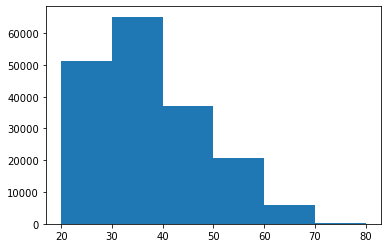

In [42]:
plt.hist(years, bins=[20, 30, 40, 50, 60, 70, 80])

In [43]:
retail_df

Enquiry            BookingNo         BookingDate  \
0        ENQ108622016012498   VSO108622016009469 2017-02-27 18:27:00   
1                       NaN                  NaN                 NaT   
2                       NaN    VSO10754201701175 2017-10-09 14:27:00   
3                       NaN                  NaN                 NaT   
4       DENQ101702016002537   VSO101702016003065 2017-03-27 13:40:00   
...                     ...                  ...                 ...   
385108  ENQTN10639201800408  VSOTN10639201800258 2018-08-09 14:46:00   
385109   DENQ12080201800854    VSO12080201800854 2018-08-09 14:40:00   
385110   DENQ12313201801121    VSO12313201801122 2018-08-09 14:51:00   
385111    ENQ26934201800343    VSO26934201800210 2018-08-09 15:22:00   
385112    ENQ11549201800962    VSO11549201800890 2018-07-31 18:13:00   

       ReqDeliveryDate PromisedDeliveryDate           InvoiceNo InvoiceDate  \
0           2017-02-27           2017-02-27  VSI108622016009203  2017-02-27   
1                  NaT                  NaT    AVSI101031800076  2018-05-22   
2           2017-10-09           2017-10-09     VSI107541701159  2020-09-09   
3                  NaT                  NaT    AVSI102031700365  2020-09-09   
4           2017-03-27           2017-03-27  VSI101702016003064  2017-03-27   
...                ...                  ...                 ...         ...   
385108      2018-08-09           2018-08-09     VSIBM0031800244  2020-09-09   
385109      2018-08-09           2018-08-09     VSI120801800824  2020-09-09   
385110      2018-08-09           2018-08-09     VSI123131801120  2020-09-09   
385111      2018-08-09           2018-08-09     VSI104161804041  2020-09-09   
385112      2018-07-31           2018-07-31     VSI115491800903  2020-09-09   

         DealerCity     DealerState BranchType  ...          ChassisNo  \
0             HUBLI       Karnataka      Rural  ...  MD2A75BY6HWK01808   
1            BATALA          Punjab      Urban  ...  MD2A18AY9JPB78001   
2            KANPUR   Uttar Pradesh      Urban  ...  MD2A76AY6HRF79877   
3          JAGADHRI         Haryana      Urban  ...  MD2B37AY2HPG24332   
4              KOTA       Rajasthan      Urban  ...  MD2A11CZ6HRK00738   
...             ...             ...        ...  ...                ...   
385108    NEW DELHI           Delhi      Urban  ...  MD2A76AY2JRE85033   
385109  BULANDSHAHR   Uttar Pradesh      Rural  ...  MD2A11CY8JCE39663   
385110       PURNEA           Bihar      Urban  ...  MD2A36FY2JCC46055   
385111     VIJAWADA  Andhra Pradesh      Rural  ...  MD2A18AY3JPF09803   
385112         KADI         Gujarat      Rural  ...  MD2A11CY8JWD13348   

           EngineNo  TotalAmount FinanceCompany Age Segment Enquiry_flag  \
0       JHYWHK67538      59722.0  Ninja finance NaN      M3            1   
1       DUYPJB71242     175237.0            NaN NaN      M1            0   
2       PFYRHF12014      45476.0            NaN NaN      M1            0   
3       PFYPHG24150     624800.0            NaN NaN      M1            0   
4       DHZRGJ72344      76474.0  Ninja finance NaN      S1            1   
...             ...          ...            ...  ..     ...          ...   
385108  DHYRJB65782      76929.0            NaN NaN      S1            1   
385109  DUYPJD38004      32621.0            NaN NaN      M1            1   
385110  PFYRJD84881      46418.0  Ninja finance NaN      M1            1   
385111  DHYCJD30025      77862.0         Others NaN      S1            1   
385112  PFYRJL52532      46415.0  Ninja finance NaN      M1            1   

       Booking_flag  Invoice_type Finance_flag  
0                 1           VSI            1  
1                 0          AVSI            0  
2                 1           VSI            0  
3                 0          AVSI            0  
4                 1           VSI            1  
...             ...           ...          ...  
385108            1         VSIBM            0  
385109      